In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split # For splitting dataset into train and test
from sklearn.preprocessing import MinMaxScaler # For scaling or normalization
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Getting the Data:

In [3]:
# Load the dataset
df = pd.read_csv('Weather Data.csv')

df.head(15)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,1/1/2012 9:00,-1.3,-3.1,88,15,4.0,101.20,Fog


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [5]:
# Check the unique categorical values present in the dependent variable:
df['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

# Data cleaning:

In [6]:
# Step 1: Remove the duplicate rows
df.drop_duplicates(inplace=True)

#Once again check the info:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 617.6+ KB


In [7]:
# Make a copy of the dataframe df into 'du'
du = df.copy()

In [8]:
#Look for the outliers and remove them:

from scipy import stats

for col in ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']:
    
    v = du[col].values

    z_scr = stats.zscore(v)

    threshold = 3

    outlier_indices = np.where(np.abs(z_scr) > threshold)
    
    du = du.drop(outlier_indices[0])
    

du.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8650 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8650 non-null   object 
 1   Temp_C            8650 non-null   float64
 2   Dew Point Temp_C  8650 non-null   float64
 3   Rel Hum_%         8650 non-null   int64  
 4   Wind Speed_km/h   8650 non-null   int64  
 5   Visibility_km     8650 non-null   float64
 6   Press_kPa         8650 non-null   float64
 7   Weather           8650 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 608.2+ KB


# Feature engineering:

In [9]:
# Convert 'Date/Time' column to datetime format
du['Date/Time'] = pd.to_datetime(du['Date/Time'])

# Extract the month from the 'Date/Time' column and store it in a new 'month' column
du['month'] = du['Date/Time'].dt.month

# Make a copy of cleaned dataframe du into a new dataframe df2
df2 = du.copy()

# Encode the categorical variable 'Weather'
label_encoder = LabelEncoder()
du['Weather'] = label_encoder.fit_transform(du['Weather'])

du.info()

du.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8650 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8650 non-null   datetime64[ns]
 1   Temp_C            8650 non-null   float64       
 2   Dew Point Temp_C  8650 non-null   float64       
 3   Rel Hum_%         8650 non-null   int64         
 4   Wind Speed_km/h   8650 non-null   int64         
 5   Visibility_km     8650 non-null   float64       
 6   Press_kPa         8650 non-null   float64       
 7   Weather           8650 non-null   int32         
 8   month             8650 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(3)
memory usage: 642.0 KB


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,month
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,7,1
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,7,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,9,1
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,9,1
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,7,1
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,7,1
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,7,1
7,2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,7,1
8,2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,7,1
9,2012-01-01 09:00:00,-1.3,-3.1,88,15,4.0,101.20,7,1


# Data visualizations:

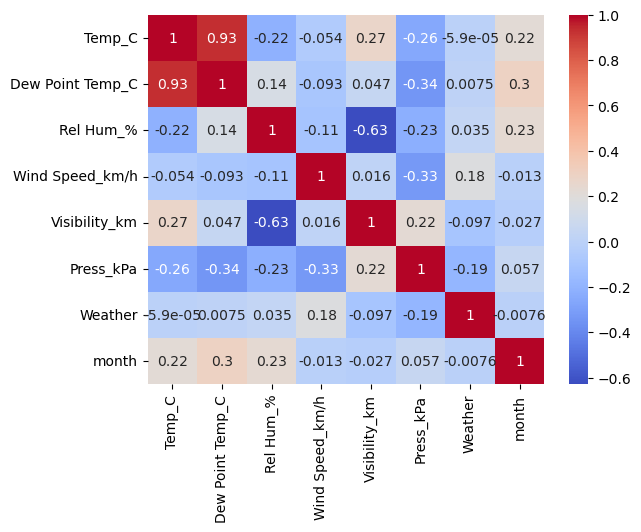

In [10]:
# Create a heatmap with annotations to show correlations between different features:
sns.heatmap(du.corr(numeric_only=True), annot=True, cmap="coolwarm")


# Show the plot
plt.show()

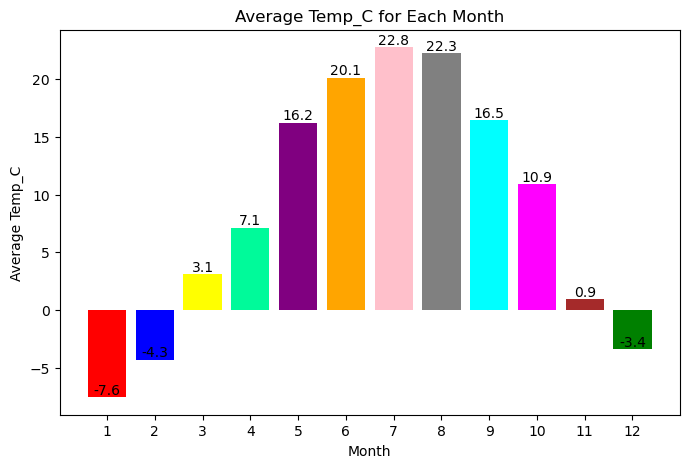

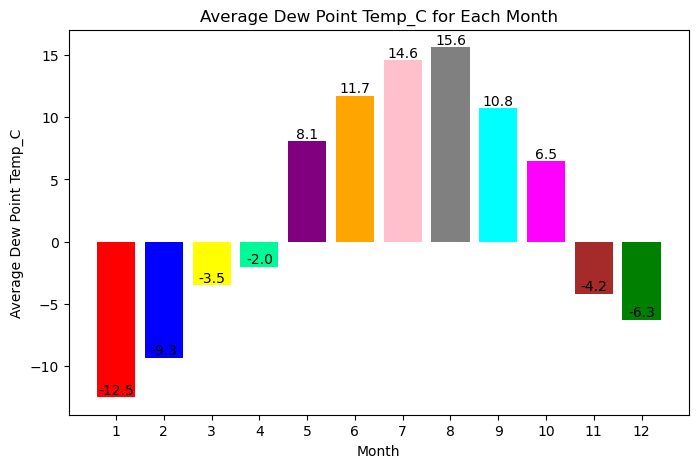

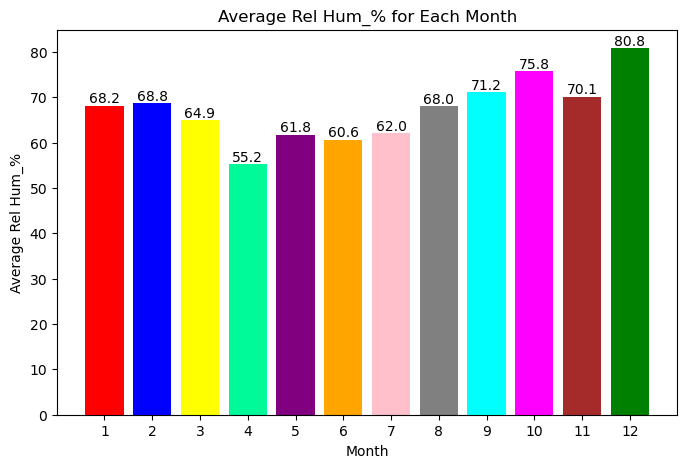

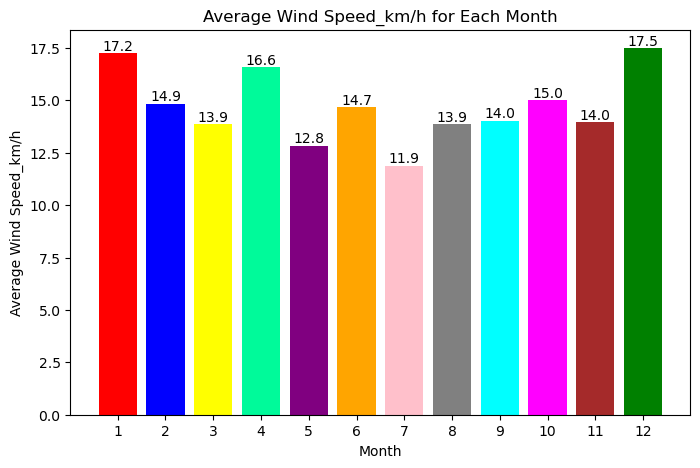

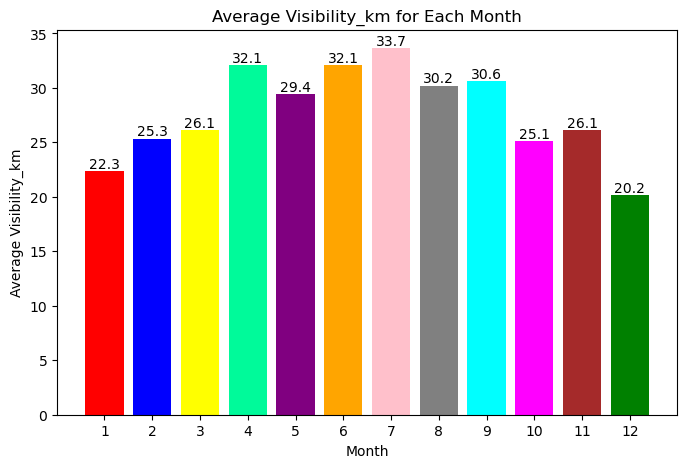

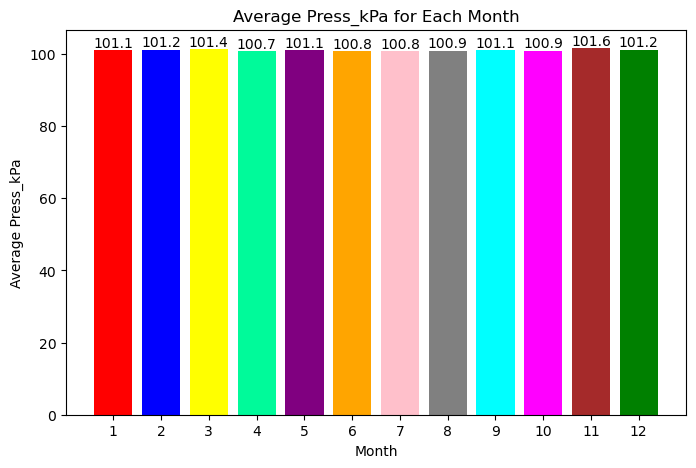

In [11]:
# Only choose numeric columns, group by the'month' column, then compute the average values.
numeric_columns = du.select_dtypes(include='number')

# Calculate the average values for each column after grouping by the'month' column.
average_values_by_month = numeric_columns.groupby('month').mean()

# Get the columns you wish to see out of the table.
columns_to_visualize = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

# Give color coding for different months:
month_colors = {1: 'red', 2: 'blue', 3: 'yellow', 4: 'mediumspringgreen', 5: 'purple', 6: 'orange', 7: 'pink', 8: 'gray', 9: 'cyan', 10: 'magenta', 11: 'brown', 12: 'green'}

# The average values for each column for each month should be plotted.
for column in columns_to_visualize:
    plt.figure(figsize=(8, 5))
    bars = plt.bar(average_values_by_month.index, average_values_by_month[column], color=[month_colors[i] for i in average_values_by_month.index])
    plt.xlabel('Month')
    plt.ylabel(f'Average {column}')
    plt.title(f'Average {column} for Each Month')
    plt.xticks(average_values_by_month.index)

    
 # Affix text labels to the bars' tops:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom')
    
    plt.show()

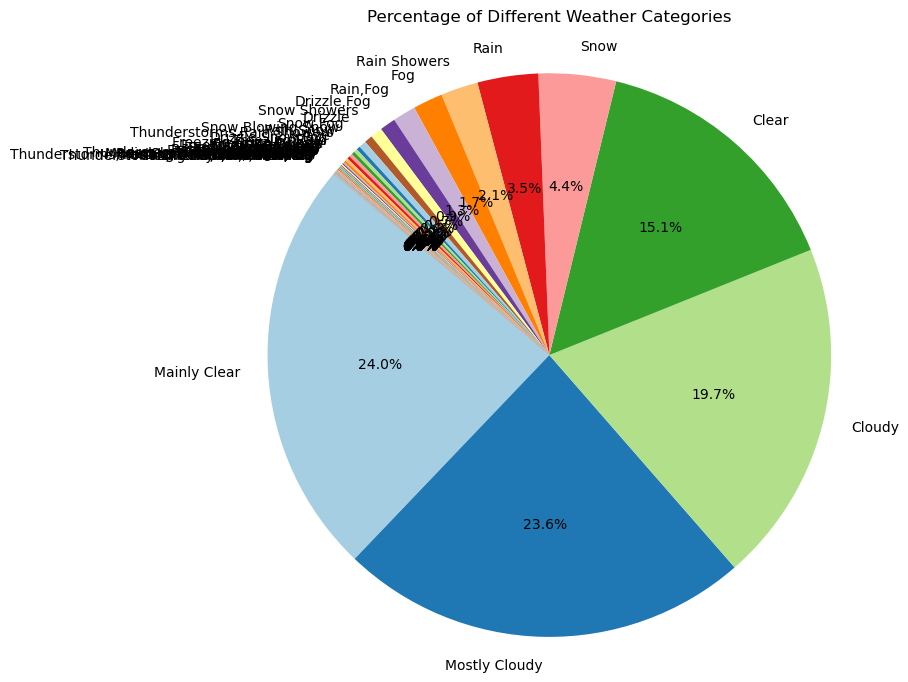

In [12]:
# Count how many times each category appears in the "Weather" column.
weather_counts = df['Weather'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage of Different Weather Categories\n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Method-1:

In [13]:
# Split data into independent variable: X and dependent variable:y
X = du.drop(columns=["Date/Time","Weather"])
y = du["Weather"]

# Show first 5 rows of X:
print ("The first 5 rows of my x_variables")
X.head(15)

The first 5 rows of my x_variables


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,month
0,-1.8,-3.9,86,4,8.0,101.24,1
1,-1.8,-3.7,87,4,8.0,101.24,1
2,-1.8,-3.4,89,7,4.0,101.26,1
3,-1.5,-3.2,88,6,4.0,101.27,1
4,-1.5,-3.3,88,7,4.8,101.23,1
5,-1.4,-3.3,87,9,6.4,101.27,1
6,-1.5,-3.1,89,7,6.4,101.29,1
7,-1.4,-3.6,85,7,8.0,101.26,1
8,-1.4,-3.6,85,9,8.0,101.23,1
9,-1.3,-3.1,88,15,4.0,101.20,1


In [14]:
# Split X and y into Training(75%) and Testing(25%) sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)



# Predict using decision tree classifier
y_pred_dt = dt_classifier.predict(X_test)


# Evaluation metrics
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted', zero_division=1))
print("F1-score:", f1_score(y_test, y_pred_dt, average='weighted', zero_division=1))
print ("precision", precision_score(y_test, y_pred_dt, average='weighted', zero_division=1))

Decision Tree Classifier:
Accuracy: 0.473416551086454
Recall: 0.473416551086454
F1-score: 0.47483433809823855
precision 0.48211669412557906


In [15]:
# Train the support vector machine classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train, y_train)

gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predict using support vector machine classifier
y_pred_svm = svm_classifier.predict(X_test)

# Predict using Random Forest classifier
y_pred_rf = RF_model.predict(X_test)

# Make predictions on the test data
y_pred_gb = gb_classifier.predict(X_test)

# Make predictions on the test data
y_pred_knn = knn_classifier.predict(X_test)

print("\nSupport Vector Machine Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm, average='weighted', zero_division=1))
print("F1-score:", f1_score(y_test, y_pred_svm, average='weighted', zero_division=1))
print ("precision", precision_score(y_test, y_pred_svm, average='weighted', zero_division=1))


print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted', zero_division=1))
print("F1-score:", f1_score(y_test, y_pred_rf, average='weighted', zero_division=1))
print ("precision", precision_score(y_test, y_pred_rf, average='weighted', zero_division=1))

print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb, average='weighted', zero_division=1))
print("F1-score:", f1_score(y_test, y_pred_gb, average='weighted', zero_division=1))
print ("precision", precision_score(y_test, y_pred_gb, average='weighted', zero_division=1))

print("\nKNeighbors Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted', zero_division=1))
print("F1-score:", f1_score(y_test, y_pred_knn, average='weighted', zero_division=1))
print ("precision", precision_score(y_test, y_pred_knn, average='weighted', zero_division=1))


Support Vector Machine Classifier:
Accuracy: 0.3841886269070735
Recall: 0.3841886269070735
F1-score: 0.36489704223626074
precision 0.43770403249037826

Random Forest Classifier:
Accuracy: 0.5654184003698567
Recall: 0.5654184003698567
F1-score: 0.5595457803403321
precision 0.5634239654845474

Gradient Boosting Classifier:
Accuracy: 0.47156726768377255
Recall: 0.47156726768377255
F1-score: 0.46856245315836137
precision 0.47399047600084837

KNeighbors Classifier:
Accuracy: 0.4026814609338881
Recall: 0.4026814609338881
F1-score: 0.39726886978330794
precision 0.4130806053183928


## Compared to all other chosen models, only the Random Forest Classifier gave performance metrics such as Precision, Recall, and accuracy values of 56%.

## Among all the chosen models, the Random Forest Classifier performed somewhat better in predicting weather, whereas the performance metrics' scores of the remaining models are less than 50%.

# Conclusion:

### Predicting nuanced weather conditions with a greater precision is a challenging task due to the complexity and chaotic nature of atmospheric systems and greater variations and classifications in Weather conditions.

### Achieving high prediction accuracy for forecasting very minute weather features is difficult, and it is not uncommon to see accuracies in the range of 40% to 60%










# Method-2:

In [16]:
# Encode categorical variable 'Weather'  (0:clear, 1:cloudy, 2: all kinds of Fog, 3: all kinds of Rain, 4: snow, 5: thunder, 6: freezing conditions)
c = {
    'Clear': 0, 'Mainly Clear': 0,
    'Mostly Cloudy': 1, 'Cloudy': 1,
    'Fog': 2, 'Freezing Drizzle,Fog': 2, 'Freezing Rain,Fog': 2, 'Rain,Fog': 2,
    'Drizzle,Fog': 2, 'Freezing Rain,Haze': 2, 'Snow,Fog': 2, 'Rain,Haze': 2,
    'Freezing Rain,Ice Pellets,Fog': 2, 'Drizzle,Ice Pellets,Fog': 2,
    'Drizzle,Snow,Fog': 2, 'Snow Showers,Fog': 2, 'Haze': 2, 'Rain,Snow,Fog': 2,
    'Rain': 3, 'Rain Showers': 3, 'Rain,Snow': 3, 'Rain Showers,Fog': 3,
    'Moderate Rain,Fog': 3, 'Rain,Snow Grains': 3, 'Rain,Snow,Ice Pellets': 3, 'Rain,Ice Pellets': 3,
    'Snow': 4, 'Snow Showers': 4, 'Snow,Ice Pellets': 4, 'Snow,Haze': 4,
    'Snow Pellets': 4, 'Drizzle,Snow': 4, 'Moderate Snow': 4,
    'Freezing Drizzle,Snow': 4, 'Freezing Rain,Snow Grains': 4,
    'Snow,Blowing Snow': 4, 'Moderate Snow,Blowing Snow': 4, 'Rain Showers,Snow Showers': 4,
    'Thunderstorms': 5, 'Thunderstorms,Rain': 5, 'Thunderstorms,Rain Showers': 5,
    'Thunderstorms,Heavy Rain Showers': 5, 'Thunderstorms,Rain Showers,Fog': 5,
    'Thunderstorms,Rain,Fog': 5, 'Thunderstorms,Moderate Rain Showers,Fog': 5,
    'Freezing Drizzle': 6, 'Drizzle': 6, 'Freezing Drizzle,Haze': 6,
    'Freezing Fog': 6, 'Freezing Rain': 6
}

df2['Weather'] = df2['Weather'].replace(c)

df2.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,month
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,2,1
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,2,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,2,1
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,2,1
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,2,1


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8650 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8650 non-null   datetime64[ns]
 1   Temp_C            8650 non-null   float64       
 2   Dew Point Temp_C  8650 non-null   float64       
 3   Rel Hum_%         8650 non-null   int64         
 4   Wind Speed_km/h   8650 non-null   int64         
 5   Visibility_km     8650 non-null   float64       
 6   Press_kPa         8650 non-null   float64       
 7   Weather           8650 non-null   int64         
 8   month             8650 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 675.8 KB


# Model selection and training:

In [24]:
# Split data into independent variable: X and dependent variable:y
X2 = df2.drop(columns=["Date/Time","Weather"])
y2 = df2["Weather"]

# Scale X:
scaler_X = MinMaxScaler()
X2_scaled = scaler_X.fit_transform(X2)

In [25]:
# Split X and y into Training(75%) and Testing(25%) sets:
X_train, X_test, y_train, y_test = train_test_split(X2_scaled, y2, test_size=0.25, random_state=42)

# Train the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict:
y_pred_dt = dt_classifier.predict(X_test)

# Train the support vector machine classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict:
y_pred_svm = svm_classifier.predict(X_test)

# Train the Random Forest Classifier:
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train, y_train)

# Predict:
y_pred_rf = RF_model.predict(X_test)

# Train the Gradient Boosting Classifier:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_classifier.predict(X_test)

# Train the KNeighbors Classifier:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_classifier.predict(X_test)

# Performance evaluation:

In [26]:
# Evaluation metrics
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted', zero_division=1))
print("F1-score:", f1_score(y_test, y_pred_dt, average='weighted', zero_division=1))
print ("precision", precision_score(y_test, y_pred_dt, average='weighted', zero_division=1))

print("\nSupport Vector Machine Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm, average='weighted', zero_division=1))
print("F1-score:", f1_score(y_test, y_pred_svm, average='weighted', zero_division=1))
print ("precision", precision_score(y_test, y_pred_svm, average='weighted', zero_division=1))

print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted', zero_division=1))
print("F1-score:", f1_score(y_test, y_pred_rf, average='weighted', zero_division=1))
print ("precision", precision_score(y_test, y_pred_rf, average='weighted', zero_division=1))

print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb, average='weighted', zero_division=1))
print("F1-score:", f1_score(y_test, y_pred_gb, average='weighted', zero_division=1))
print ("precision", precision_score(y_test, y_pred_gb, average='weighted', zero_division=1))

print("\nKNeighbors Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted', zero_division=1))
print("F1-score:", f1_score(y_test, y_pred_knn, average='weighted', zero_division=1))
print ("precision", precision_score(y_test, y_pred_knn, average='weighted', zero_division=1))

Decision Tree Classifier:
Accuracy: 0.6541840036985668
Recall: 0.6541840036985668
F1-score: 0.6545217785144868
precision 0.6558324574518543

Support Vector Machine Classifier:
Accuracy: 0.6486361534905224
Recall: 0.6486361534905224
F1-score: 0.6359264138986989
precision 0.6508718594019428

Random Forest Classifier:
Accuracy: 0.7512713823393435
Recall: 0.7512713823393435
F1-score: 0.7473880394591652
precision 0.7521744888442815

Gradient Boosting Classifier:
Accuracy: 0.6883957466481738
Recall: 0.6883957466481738
F1-score: 0.6845157988929951
precision 0.6884311474354982

KNeighbors Classifier:
Accuracy: 0.6999537679149329
Recall: 0.6999537679149329
F1-score: 0.6939521665673459
precision 0.701277086280045


## In the 2nd Method, we have consolidated the minute categories of weather into broader classifications. Hence, the Machine Learning Models performed better than they had previously.

## Now we can see that the Accuracy of Random Forest Classifier is 75%. 
## KNeighbors Classifier is the other model that is precisely predicting our dependent variable "Weather", upto 70%

# Conclusion:


## This indicates that the broader and more generalized the classification, the higher the accuracy of weather prediction, and with a detailed and higher number of classifications, the precision with which we can predict the weather decreases.